In [30]:
import pandas as pd
import importlib
import mpt_functions as mpt
importlib.reload(mpt)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = "/Users/abdullahfurkanarslan/Desktop/metropt+3+dataset 2/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)

In [4]:
# df1 is the new version of df without the column "Unnamed: 0"
df1 = mpt.drop_a_column(df, "Unnamed: 0")

data is not labeled but it could be labeled since breakdown data is given. it will be labeled accordingly to picture given in the data description.
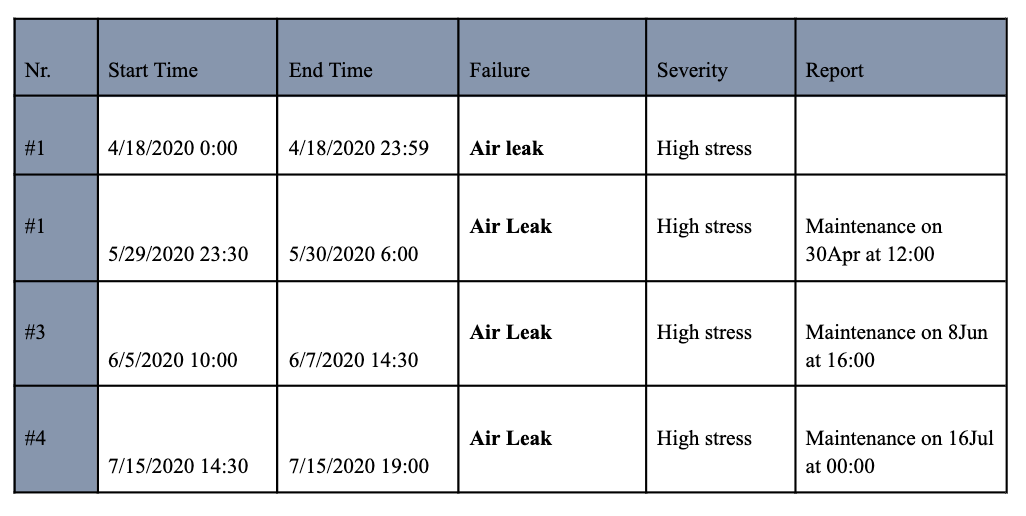


In [5]:
# this should be checked

f1_start = "2020-04-18 00:00:00"
f1_finish = "2020-04-18 23:59:00"
f2_start = "2020-05-29 23:30:00"
f2_finish = "2020-05-30 06:00:00"
f3_start = "2020-06-05 10:00:00"
f3_finish = "2020-06-07 14:30:00"
f4_start = "2020-07-15 14:30:00"
f4_finish = "2020-07-15 19:00:00"

In [6]:
# # df2 is the new version of df1 with "condition" column added.

df2 = df1.assign(condition=0)
df2.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


condition
0    1486994
1      29954
Name: count, dtype: int64


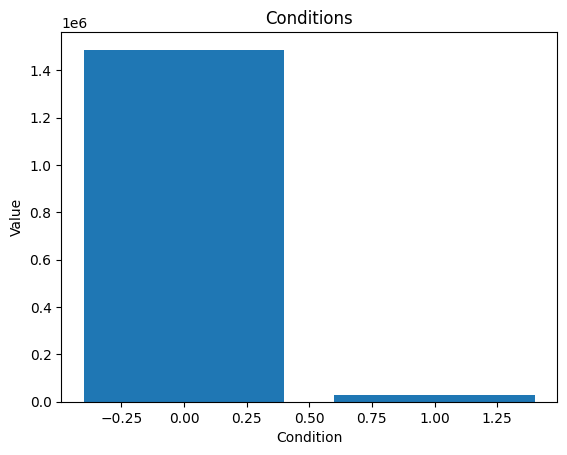

In [28]:
df2a = mpt.change_the_values_by_applying_a_time_filter(df2, f1_start, f1_finish, "condition", 1)
df2b = mpt.change_the_values_by_applying_a_time_filter(df2a, f2_start, f2_finish, "condition", 1)
df2c = mpt.change_the_values_by_applying_a_time_filter(df2b, f3_start, f3_finish, "condition", 1)
df2 = mpt.change_the_values_by_applying_a_time_filter(df2c, f4_start, f4_finish, "condition", 1)

print(df2["condition"].value_counts())


plt.bar([0, 1], df2["condition"].value_counts())
plt.title('Conditions')
plt.xlabel('Condition')
plt.ylabel('Value')
plt.show()

<Axes: >

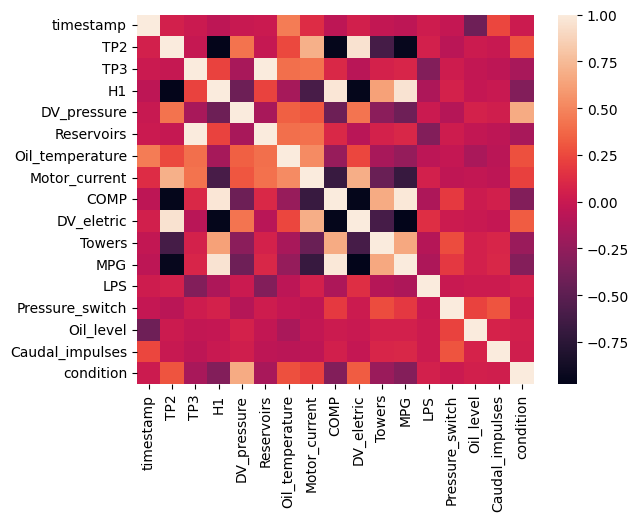

In [29]:
sns.heatmap(df2.corr())